# Bellman-Ford Algorithm

The Bellman-Ford algorithm is a versatile and fundamental algorithm in graph theory used to find the shortest paths from a single source node to all other nodes in a weighted graph. What distinguishes Bellman-Ford is its ability to handle graphs with negative edge weights, making it applicable in a broader range of scenarios compared to algorithms like Dijkstra's. Additionally Bellman-Ford is guaranteed to find the shortest possible path in a graph, since it's not a greedy algorithm. Although this does mean that Bellman-Ford is a slower algorithm than Dijkstra’s and also more space-intensive than A*.

The algorithm begins by initializing the distances to all nodes from the source node as infinity, except for the source itself, which is set to zero. It then iteratively relaxes the edges, reducing the estimated distance to each node by identifying shorter paths. This process is repeated for the number of vertices minus one iterations, ensuring the algorithm converges to the correct shortest paths. While Bellman-Ford may be less efficient than some alternatives, its robustness in handling various graph types makes it a valuable tool in solving a wide array of pathfinding problems.

## Bellman-Ford algorithm steps:

- Create table where shortest distance from start node to other nodes is recorded
- To start, input distance from starting node to each node into the table
    - Starting node = 0, all others = ∞
- Iterate through vertices -1 times
    - Iterate through each vertex
    - Checks if current distance on the table isn’t infinity
        - Loops through each neighbor and checks if the distance to travel to the current node + distance between current node and neighbor is shorter than the neighbor’s previously recorded shortest distance



In [6]:
from math import inf
from visualization import visualize_graph

class graph_vertex:
  def __init__(self, name, x, y):
    self.name = name
    self.position = (x, y)

# Set up example graph
a = graph_vertex("A", 0, 2)
b = graph_vertex("B", 1, 4)
c = graph_vertex("C", 1, 1)
d = graph_vertex("D", 2, 2)
e = graph_vertex("E", 4, 1)
f = graph_vertex("F", 5, 3)
g = graph_vertex("G", 6, 1)

euclidean_graph = {
  a: set([(b, 3), (c, 4)]),
  b: set([(a, 3), (d, 5)]),
  c: set([(a, 4), (d, 7)]),
  d: set([(b, 5), (c, 7), (e, 9), (f, 8)]),
  e: set([(d, 8), (g, 6), (f, 3)]),
  f: set([(d, 9), (g, 4), (e, 3)]),
  g: set([(e, 6), (f, 4)])
}

In [4]:
def BellmanFord(graph, start):
    """
    Applies the Bellman-Ford algorithm to find the shortest paths from a starting vertex in a weighted graph.

    Parameters:
    - graph (dict): A dictionary representing the weighted graph where keys are vertices and values are lists
                    of neighboring vertices along with corresponding edge weights.
    - start: The starting vertex for finding shortest paths.

    Returns:
    - dict: A dictionary containing the shortest distances and predecessors for each vertex.
            Format: {vertex: [shortest_distance, predecessor]}
    """

    # Initialize distances dictionary with infinity for all vertices and None as predecessors
    distances = {vertex: [float("Inf"), None] for vertex in graph}

    # Set the distance to the start vertex as 0
    distances[start][0] = 0
    distances[start][1] = start

    # Iterate through vertices - 1 times (V-1 iterations)
    for _ in range(len(graph) - 1):
        # Iterate through each vertex and its neighbors
        for current_vertex, neighbors in graph.items():
            # Check if the distance to the current vertex is not infinity
            if distances[current_vertex][0] != float("Inf"):
                # Iterate through neighbors and update distances if a shorter path is found
                for neighbor, edge_weight in neighbors:
                    if distances[current_vertex][0] + edge_weight < distances[neighbor][0]:
                        distances[neighbor][0] = distances[current_vertex][0] + edge_weight
                        distances[neighbor][1] = current_vertex

    return distances



def path(distances, start, target):
    """
    Reconstruct the shortest path from a starting vertex to a target vertex using Bellman-Ford's algorithm.

    Parameters:
    - distances (dict): A dictionary containing the shortest distances and predecessors obtained from Bellman-Ford's algorithm.
    - start: The starting vertex of the path.
    - target: The target vertex of the path.

    Returns:
    - list: A list representing the shortest path from the start vertex to the target vertex.
    """
    print(f"This is the shortest path from {start.name} to {target.name}:")

    # Initialize the path with the target vertex
    path = [target.name]

    # Trace back the path from the target to the start using predecessors in distances
    curr = target
    while True:
        curr = distances[curr][1]  # Move to the predecessor
        path = [curr.name] + path  # Add the current vertex to the path
        if curr.name == start.name:  # Break the loop when the start vertex is reached
            break
    return path

distances_from_a = BellmanFord(euclidean_graph, a)
path_from_a_to_g = path(distances_from_a, a, e)
print(path_from_a_to_g)

print("Shortest Distance from A to")
for key, value in distances_from_a.items():
  print(f"{key.name}: {value[0]} | Previous node: {value[1].name}")


This is the shortest path from A to E:
['A', 'B', 'D', 'E']
Shortest Distance from A to
A: 0 | Previous node: A
B: 3 | Previous node: A
C: 4 | Previous node: A
D: 8 | Previous node: B
E: 17 | Previous node: D
F: 16 | Previous node: D
G: 20 | Previous node: F


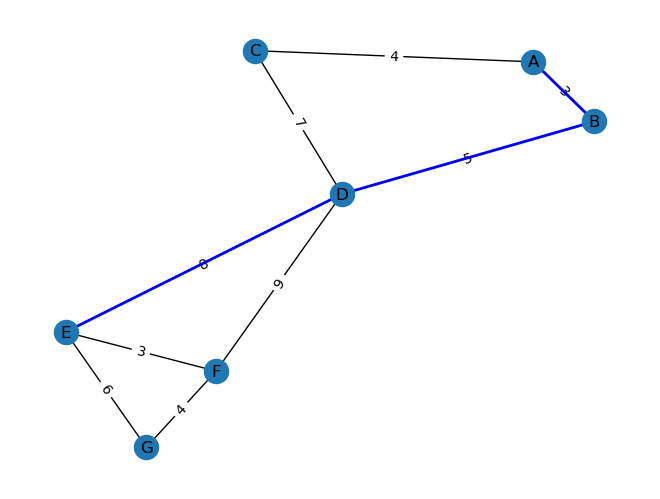

In [15]:
def create_edge_dict(graph):
  """
    Converts a graph into a dictionary for edge visualization.

    Parameters:
        graph (dict): A dictionary representing the graph.

    Returns:
        dict: A dictionary where keys are tuples (start_vertex_name, end_vertex_name) and values are edge weights.
  """
  edge_dict = {}
  for key, connections in graph.items():
    for conn in connections:
        edge_dict[(key.name, conn[0].name)] = conn[1]
            
  return edge_dict

# Visualization of the graph
graph_edge_dict = create_edge_dict(euclidean_graph)
print()
visualize_graph(graph_edge_dict, path_from_a_to_g)

## Time Complexity Breakdown

**1. Initialization of distances dictionary:**
- Loop through every node and add it to the distance dictionary
- Time complexity: O(V), where V is the number of vertices in the graph.

**2. Initialize the starting node**
- This sets the distance to the start vertex as 0 in the distances dictionary.
    - Referencing and editing values in a dictionary (hashmap) takes O(1) 
- Time complexity: O(1)

**3. Outer loop V-1**
- The outer loop runs V-1 times, where V is the number of vertices.
    - Simplifies from V-1 to V
- Time complexity: O(V).

**4. Middle loop (Iterating through vertices):**
- Time complexity: O(V).

**5. Inner loop( (Iterating through neighbors)):**
- This loop iterates through the neighbors of the current vertex.
- Time complexity: O(E), where E is the number of edges in the graph.

**6. Operations inside the innermost loop:**
- These operations involve constant time.
- Time complexity: O(1).

**7. Find the shortest path from the distance dictionary (path function)**
- The while loop runs in proportion to the length of the shortest path from the start to the target vertex. 
    - In the worst case, the length of the shortest path is V, where V is the number of vertices.
- Each iteration of the loop involves constant time operations.
- Time complexity: O(V)

The outer loop runs for V-1 iterations (where V is the number of vertices). Each iteration of the outer loop processes all edges in the graph, resulting in a total of E iterations for the innermost loop (where E is the number of edges). Therefore, the time complexity of the BellmanFord function is O(V * E).

## Sources:

GeeksforGeeks. "Bellman-Ford Algorithm." GeeksforGeeks, https://www.geeksforgeeks.org/bellman-ford-algorithm-dp-23/.

GeeksforGeeks. "Comparison between Shortest Path Algorithms." GeeksforGeeks, https://www.geeksforgeeks.org/comparison-between-shortest-path-algorithms/.s/